In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
data=pd.read_excel('Infant Child Data.xlsx',sheet_name=1)

In [3]:
data.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Baby_Gender,Baby_Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
Mom_weight           189 non-null int64
Mom_height           189 non-null int64
Mom_Age              189 non-null int64
Religion             189 non-null int64
Baby_Gender          189 non-null int64
Baby_Birth_Weight    189 non-null float64
dtypes: float64(1), int64(5)
memory usage: 8.9 KB


In [5]:
data.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Baby_Gender,Baby_Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.232804,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.423741,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.000000,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.000000,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.000000,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.000000,3.440000
max,79.000000,189.000000,45.000000,3.000000,2.000000,4.150000


## simple linear Regression

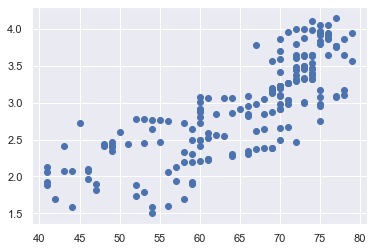

In [9]:
plt.scatter(x='Mom_weight',y='Baby_Birth_Weight',data=data)

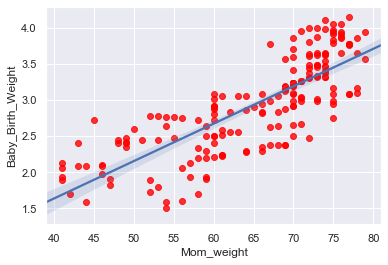

In [10]:
sns.regplot(x='Mom_weight',y='Baby_Birth_Weight',data=data,scatter_kws={'color':'red'})

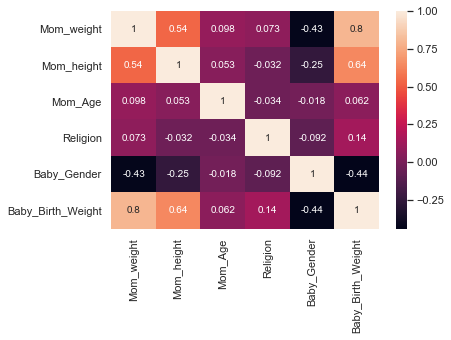

In [11]:
sns.heatmap(data.corr(),annot=True)

In [14]:
X=data.iloc[:,0].values
y=data.iloc[:,-1].values

In [15]:
print(len(X),len(y))

189 189


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #since we have 80:20 train:test model selection

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train=X_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)

(151,)
(38,)
(151,)
(38,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred=lr.predict(X_test)
y_pred

array([3.56887651, 3.30911944, 2.68570245, 3.46497368, 3.41302227,
       3.25716802, 2.47789679, 3.41302227, 1.85447981, 2.01033405,
       1.95838264, 3.25716802, 2.5298482 , 2.78960528, 3.2052166 ,
       3.67277934, 2.73765387, 3.2052166 , 3.30911944, 3.56887651,
       3.2052166 , 3.46497368, 3.25716802, 3.15326519, 2.94545953,
       2.32204254, 3.2052166 , 3.2052166 , 3.25716802, 2.68570245,
       1.95838264, 3.2052166 , 3.46497368, 2.99741094, 2.99741094,
       2.63375104, 3.04936236, 1.69862556])

In [34]:
print(lr.coef_,lr.intercept_)

[0.05195142] -0.431382470830044


In [45]:
#lets do evaluation (RMSE)
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse=sqrt(mse)
rmse


0.3676300999097667

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6603999316493241

# MLR 

In [52]:
data.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Baby_Gender,Baby_Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


Build a Multi Regression Model for predicting target variable
mom_age using all the other variables. Make a train test split of
80:20(train:test)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
Mom_weight           189 non-null int64
Mom_height           189 non-null int64
Mom_Age              189 non-null int64
Religion             189 non-null int64
Baby_Gender          189 non-null int64
Baby_Birth_Weight    189 non-null float64
dtypes: float64(1), int64(5)
memory usage: 8.9 KB


In [57]:
data.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Baby_Gender,Baby_Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.232804,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.423741,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.000000,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.000000,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.000000,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.000000,3.440000
max,79.000000,189.000000,45.000000,3.000000,2.000000,4.150000


In [ ]:
# so here in this data we have 6 columns out of that 2 columns are categorical columns

In [55]:
data.Religion.value_counts()

1    85
2    58
3    46
Name: Religion, dtype: int64

In [56]:
data.Baby_Gender.value_counts()

1    145
2     44
Name: Baby_Gender, dtype: int64

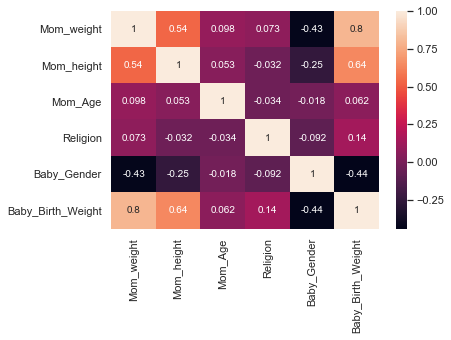

In [53]:
sns.heatmap(data.corr(),annot=True)

In [59]:
data=pd.get_dummies(data,columns=['Religion','Baby_Gender'],drop_first=True)
data.head()

,Mom_weight,Mom_height,Mom_Age,Baby_Birth_Weight,Religion_2,Religion_3,Baby_Gender_2
0,41,152,25,2.06,0,0,0
1,42,157,25,1.70,0,1,0
2,44,153,23,1.59,1,0,0
3,45,177,19,2.73,1,0,0
4,46,160,19,2.08,1,0,0


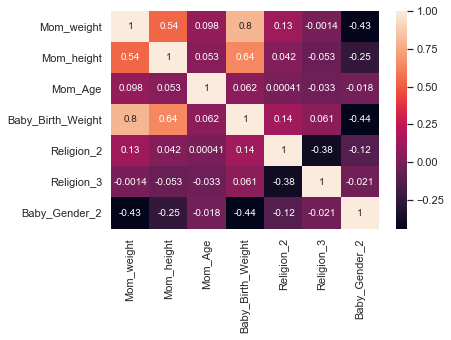

In [60]:
sns.heatmap(data.corr(),annot=True)

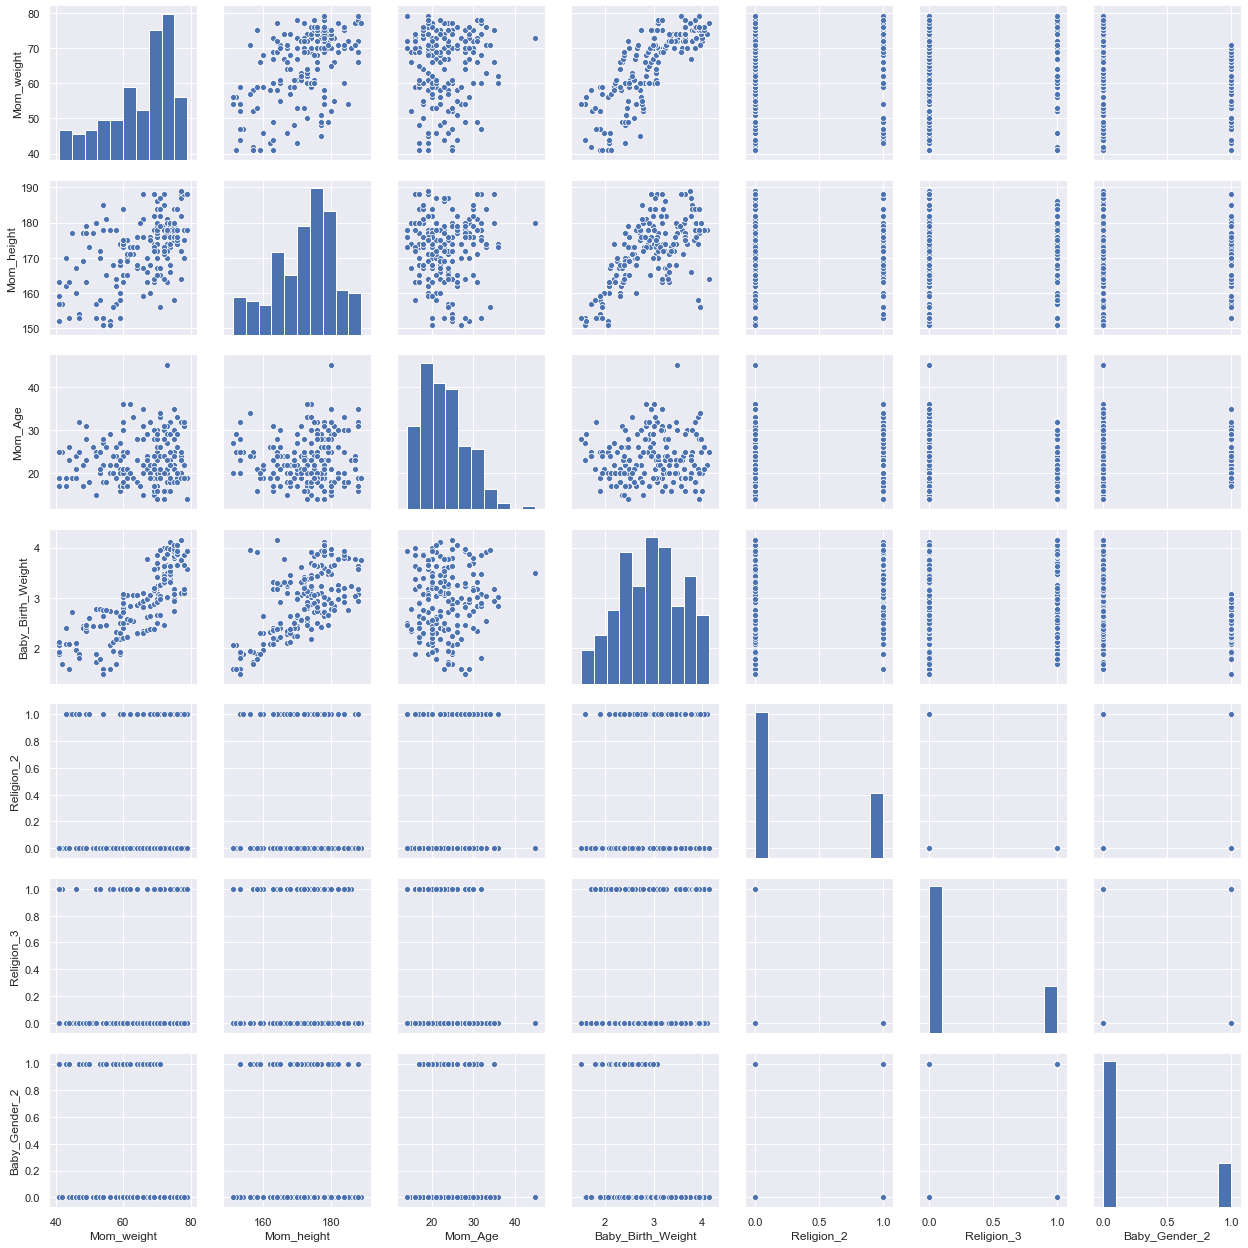

In [61]:
sns.pairplot(data,palette='set10')

I will create a model on 3 different dataset

In [67]:
#Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
print(X.shape)
mlr = LinearRegression()
mlr.fit(X, y)
model = SelectFromModel(mlr, prefit=True)
X_new = model.transform(X)
X_new.shape

(189, 6)


(189, 4)

In [ ]:
y=data.Mom_Age.values

In [102]:
X_new

array([[2.06, 0.  , 0.  , 0.  ],
       [1.7 , 0.  , 1.  , 0.  ],
       [1.59, 1.  , 0.  , 0.  ],
       [2.73, 1.  , 0.  , 0.  ],
       [2.08, 1.  , 0.  , 0.  ],
       [2.1 , 0.  , 0.  , 0.  ],
       [1.97, 0.  , 1.  , 0.  ],
       [1.9 , 1.  , 0.  , 0.  ],
       [2.44, 0.  , 0.  , 0.  ],
       [2.4 , 1.  , 0.  , 0.  ],
       [2.44, 0.  , 0.  , 0.  ],
       [1.89, 0.  , 1.  , 0.  ],
       [1.73, 0.  , 0.  , 0.  ],
       [2.78, 0.  , 0.  , 0.  ],
       [2.45, 0.  , 1.  , 0.  ],
       [1.59, 0.  , 0.  , 0.  ],
       [2.64, 1.  , 0.  , 0.  ],
       [1.6 , 0.  , 0.  , 0.  ],
       [2.75, 0.  , 0.  , 0.  ],
       [2.06, 0.  , 1.  , 0.  ],
       [1.7 , 0.  , 0.  , 0.  ],
       [2.33, 0.  , 0.  , 0.  ],
       [2.72, 0.  , 0.  , 0.  ],
       [1.9 , 0.  , 1.  , 0.  ],
       [2.19, 0.  , 0.  , 0.  ],
       [2.3 , 0.  , 0.  , 0.  ],
       [2.64, 1.  , 0.  , 0.  ],
       [2.5 , 0.  , 1.  , 0.  ],
       [2.81, 1.  , 0.  , 0.  ],
       [2.88, 0.  , 0.  , 0.  ],
       [2.

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=0)  #since we have 80:20 train:test model selection

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 4)
(38, 4)
(151,)
(38,)


In [112]:
from sklearn.linear_model import LinearRegression
mlr_1=LinearRegression()

In [114]:
mlr_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_pred=mlr_1.predict(X_test)
y_pred

array([23.37062916, 22.92473018, 23.16274191, 23.26298677, 23.32122926,
       23.19420093, 23.11478706, 22.86827315, 23.22094205, 22.71078759,
       22.88543037, 23.42912736, 23.17154215, 22.82975699, 23.32152731,
       23.30005787, 22.66361641, 23.2471294 , 23.20478663, 23.47117208,
       23.09187256, 23.01294429, 22.7341877 , 23.32679899, 23.51381291,
       22.55805753, 22.723602  , 23.27357246, 23.43767189, 22.54717378,
       22.77430176, 22.6142165 , 23.09187256, 22.97364448, 23.14654414,
       22.97190137, 23.32327042, 22.59334317])

In [116]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse=sqrt(mse)
rmse


4.641085079514835

In [117]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.012608559476699366

MLR on another set of data

In [ ]:
X=data[['Mom_weight','Mom_height','Baby_Birth_Weight']]
y=data.Mom_Age.values

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #since we have 80:20 train:test model selection

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 3)
(38, 3)
(151,)
(38,)


In [120]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [121]:
mlr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
y_pred=mlr.predict(X_test)
y_pred

array([23.62566003, 23.21295215, 23.12468331, 23.7962864 , 23.25106351,
       23.10733127, 22.80779055, 23.24293841, 22.15440368, 22.26788428,
       22.37686559, 23.90750925, 22.95993704, 23.18324056, 23.61388654,
       23.94870637, 22.81396498, 23.04849038, 23.07203218, 23.68589707,
       23.58838683, 23.0291651 , 23.50629587, 23.6178096 , 23.33509791,
       22.86494907, 23.07258757, 23.53991432, 22.2600833 , 23.01484937,
       22.21072404, 23.66319343, 23.92460746, 23.51862044, 23.48527375,
       22.83833944, 23.46539049, 22.00282446])

In [123]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse=sqrt(mse)
rmse


4.617789006754876

In [124]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0024684317277161583

MLR on another set of data

In [125]:
data.columns

Index(['Mom_weight', 'Mom_height', 'Mom_Age', 'Baby_Birth_Weight',
       'Religion_2', 'Religion_3', 'Baby_Gender_2'],
      dtype='object')

In [126]:
X2=data[['Mom_weight', 'Mom_height', 'Baby_Birth_Weight',
       'Religion_2', 'Religion_3', 'Baby_Gender_2']]
y=data['Mom_Age'].values

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=0)  #since we have 80:20 train:test model selection

In [128]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 6)
(38, 6)
(151,)
(38,)


In [129]:
from sklearn.linear_model import LinearRegression
mlr_2=LinearRegression()

In [130]:
mlr_2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y_pred=mlr_2.predict(X_test)
y_pred

array([23.63528303, 22.84431634, 23.55264586, 23.84950274, 23.29804502,
       23.143903  , 22.66306895, 22.9332697 , 22.53340447, 22.0070763 ,
       22.13801678, 24.46871519, 23.47288922, 23.26152699, 24.13590782,
       23.9368009 , 22.32240542, 23.06230934, 23.14334153, 23.77598119,
       23.48431313, 22.77373938, 23.07144932, 24.23167478, 23.87730334,
       22.85398646, 22.73713987, 23.52830372, 22.48170151, 22.46609339,
       21.92419275, 23.18456069, 23.86003407, 23.4751186 , 23.41064115,
       22.67854717, 24.06941374, 21.90454737])

In [132]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse=sqrt(mse)
rmse

4.638217087773295

In [133]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.011357448749277133

Measure the performance of the MLR model on the following
metrics

As mom age is a continuous variable, we cannot find a Measure the performance Accuracy
1. Misclassification Rate/ Error
2. Precision & Recall
3. Draw the Confusion matrix 